# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
import catboost as cb

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

import xgboost as xgb
from tensorflow.keras.layers import Dense,Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential

# Importing Data

In [2]:
df=pd.read_csv('solar.csv')

In [3]:
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [4]:
df.shape

(32686, 11)

# Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [6]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [7]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [8]:
sum(df.duplicated())

0

# Analysing Data

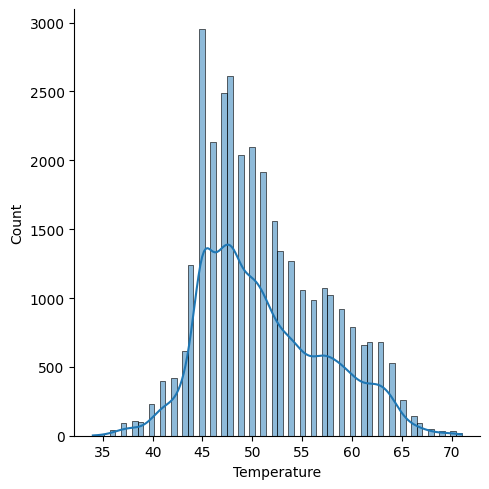

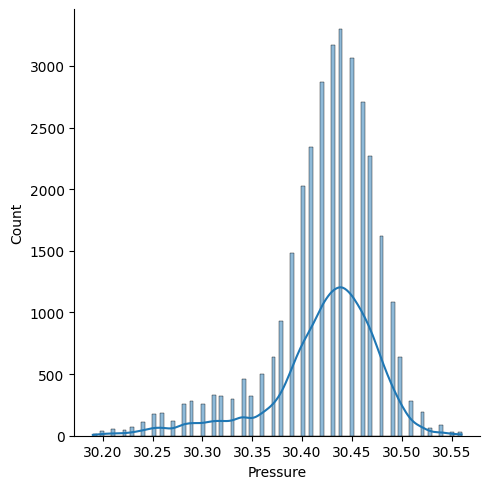

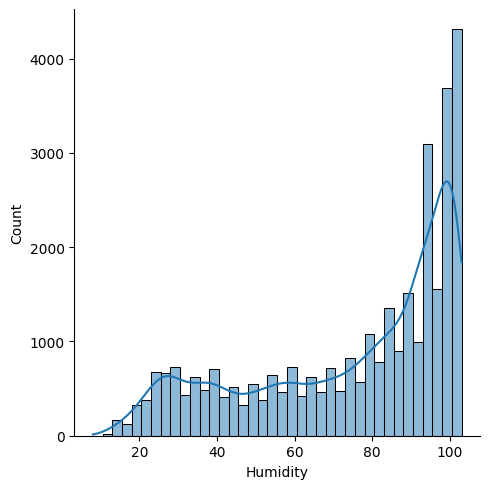

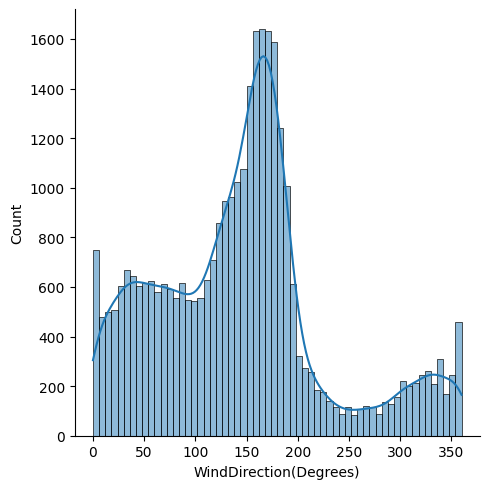

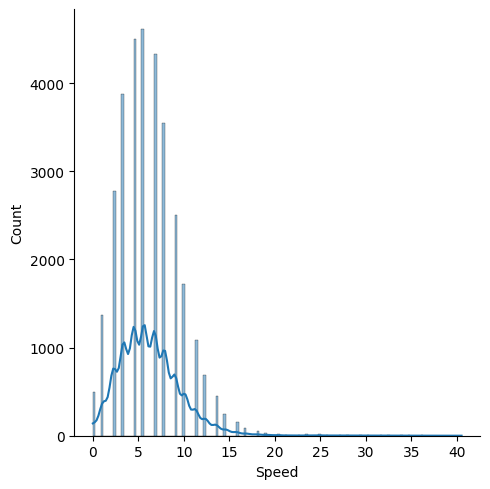

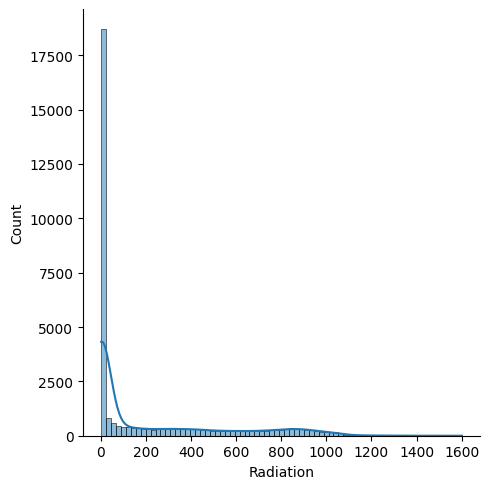

In [9]:
features=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','Radiation']
for i in features:
    sns.displot(x=i,data=df,kde=True)

In [10]:
features=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']
l=list(enumerate(features))
l

[(0, 'Temperature'),
 (1, 'Pressure'),
 (2, 'Humidity'),
 (3, 'WindDirection(Degrees)'),
 (4, 'Speed')]

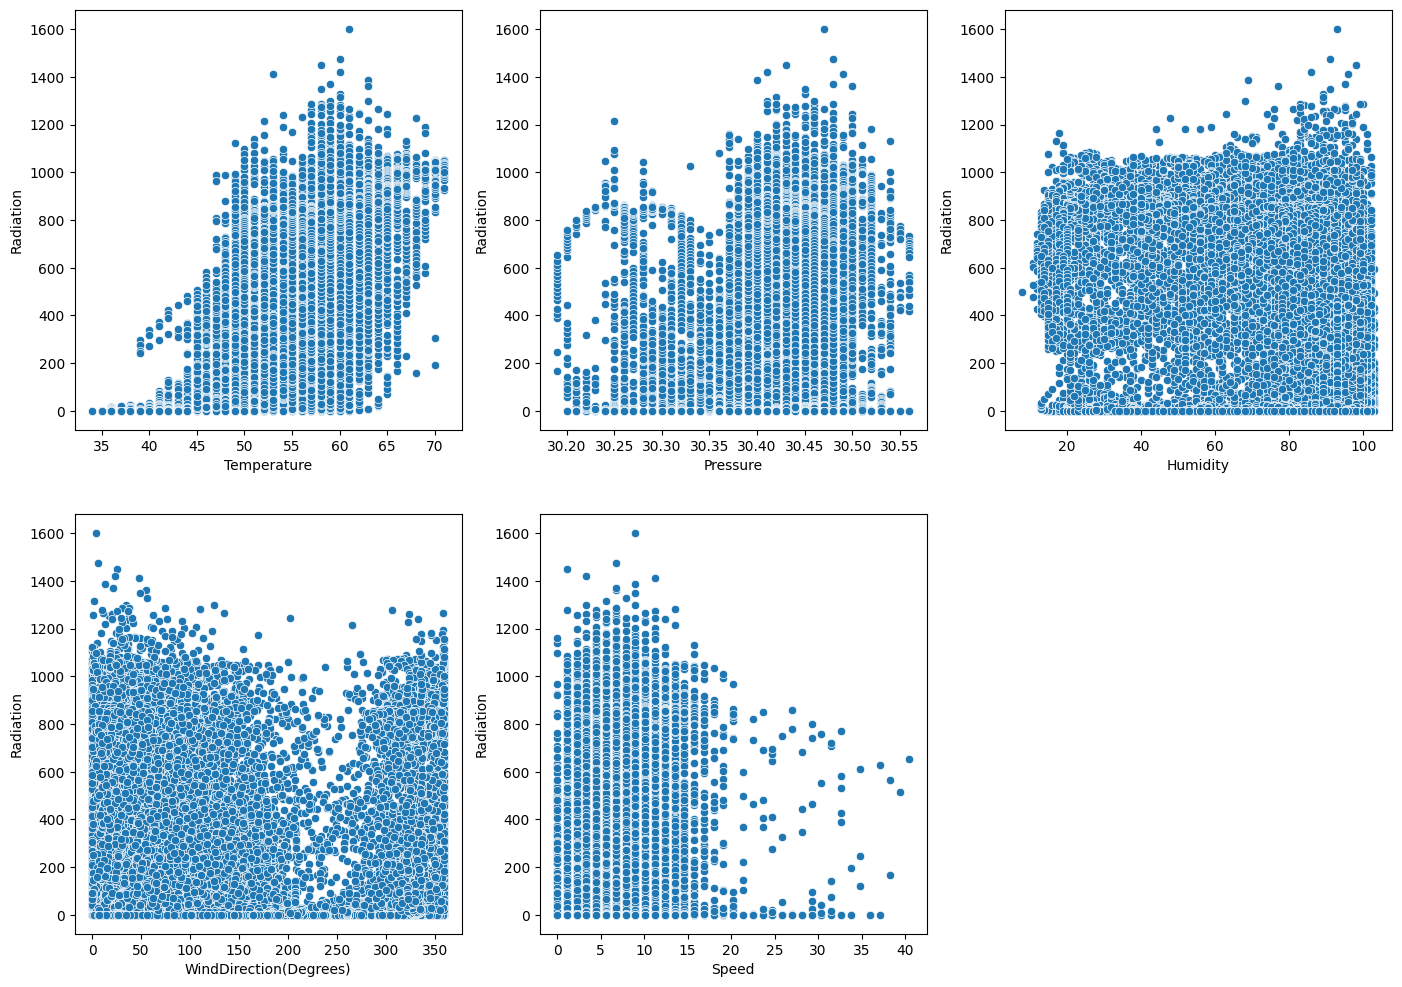

In [11]:
plt.figure(figsize=(17,12))
for i in l:
    plt.subplot(2,3,i[0]+1)
    sns.scatterplot(x=i[1],y='Radiation',data=df)
    

<AxesSubplot:>

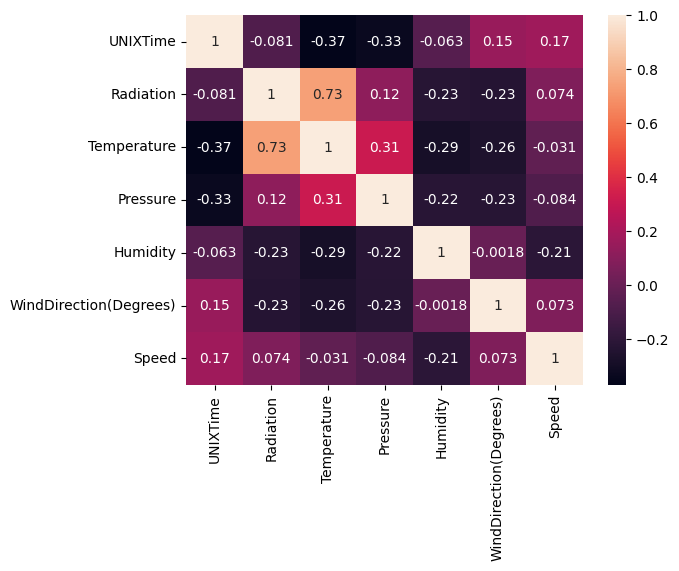

In [12]:
sns.heatmap(df.corr(),annot=True)

Temperature is most effective parameter for radiation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


<AxesSubplot:>

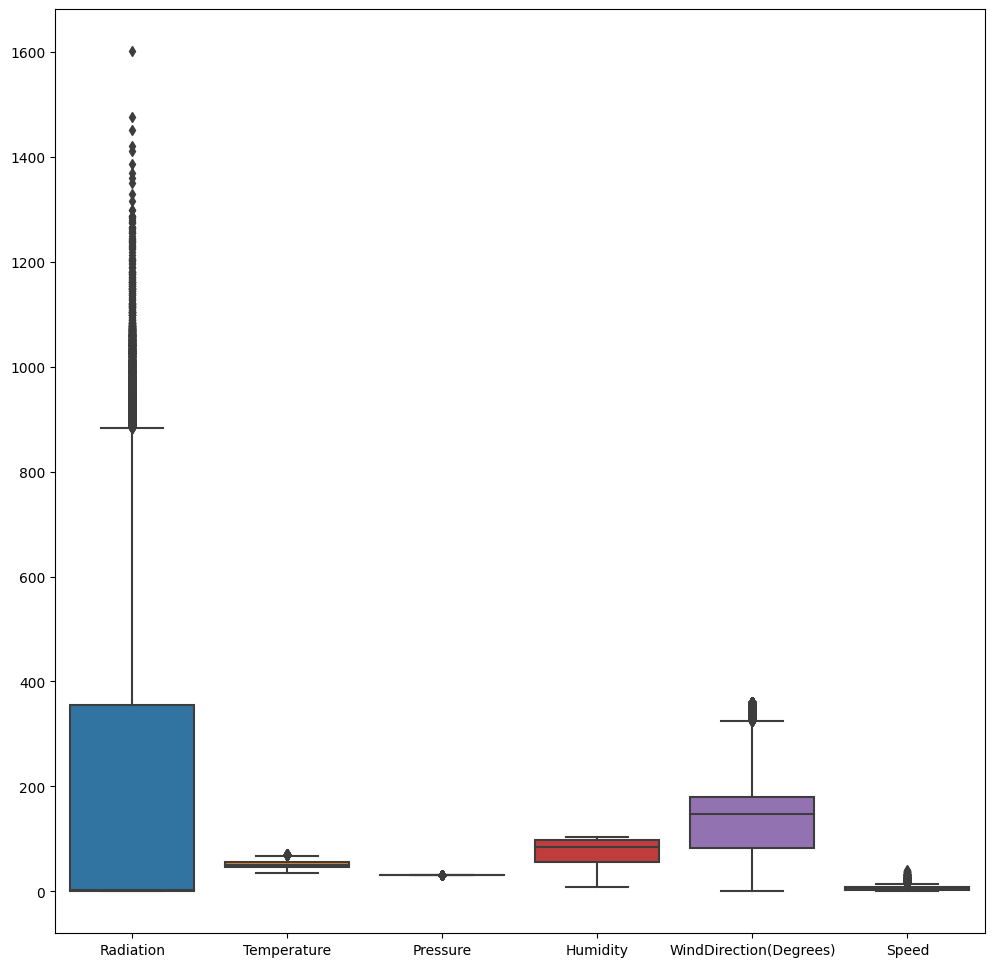

In [14]:
plt.figure(figsize=(12,12))
copy=df.drop(['UNIXTime'],axis=1)
sns.boxplot(copy)

In [15]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [17]:
df['Date_data']=df['Data'].apply(lambda x:x.split()[0])

In [18]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date_data
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9/29/2016
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9/29/2016
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9/29/2016
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9/29/2016
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9/29/2016


In [19]:
df['Date']=df['Date_data'].apply(lambda x:x.split('/')[1])
df['Month']=df['Date_data'].apply(lambda x:x.split('/')[0])
df['Year']=df['Date_data'].apply(lambda x:x.split('/')[2])


In [20]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date_data,Date,Month,Year
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9/29/2016,29,9,2016
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9/29/2016,29,9,2016
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9/29/2016,29,9,2016
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9/29/2016,29,9,2016
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9/29/2016,29,9,2016


In [21]:
df['Hour']=pd.to_datetime(df['Time']).dt.hour

In [22]:
df['Minute']=pd.to_datetime(df['Time']).dt.minute
df['Second']=pd.to_datetime(df['Time']).dt.second

In [23]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date_data,Date,Month,Year,Hour,Minute,Second
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9/29/2016,29,9,2016,23,55,26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9/29/2016,29,9,2016,23,50,23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9/29/2016,29,9,2016,23,45,26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9/29/2016,29,9,2016,23,40,21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9/29/2016,29,9,2016,23,35,24


In [24]:
df=df.drop(['Data','Time','Date_data'],axis=1)

In [25]:
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date,Month,Year,Hour,Minute,Second
0,1475229326,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,29,9,2016,23,55,26
1,1475229023,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,29,9,2016,23,50,23
2,1475228726,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,29,9,2016,23,45,26
3,1475228421,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,29,9,2016,23,40,21
4,1475228124,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,29,9,2016,23,35,24


In [26]:

df['RiseMinute']=pd.to_datetime(df['TimeSunRise']).dt.minute.astype(int)
df['RiseHour']=pd.to_datetime(df['TimeSunRise']).dt.hour.astype(int)
df['SetMinute']=pd.to_datetime(df['TimeSunSet']).dt.minute.astype(int)
df['SetHour']=pd.to_datetime(df['TimeSunSet']).dt.hour.astype(int)

In [27]:
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date,Month,Year,Hour,Minute,Second,RiseMinute,RiseHour,SetMinute,SetHour
0,1475229326,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,29,9,2016,23,55,26,13,6,13,18
1,1475229023,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,29,9,2016,23,50,23,13,6,13,18
2,1475228726,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,29,9,2016,23,45,26,13,6,13,18
3,1475228421,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,29,9,2016,23,40,21,13,6,13,18
4,1475228124,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,29,9,2016,23,35,24,13,6,13,18


In [28]:
df=df.drop(['TimeSunRise','TimeSunSet'],axis=1)

In [29]:
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Date,Month,Year,Hour,Minute,Second,RiseMinute,RiseHour,SetMinute,SetHour
0,1475229326,1.21,48,30.46,59,177.39,5.62,29,9,2016,23,55,26,13,6,13,18
1,1475229023,1.21,48,30.46,58,176.78,3.37,29,9,2016,23,50,23,13,6,13,18
2,1475228726,1.23,48,30.46,57,158.75,3.37,29,9,2016,23,45,26,13,6,13,18
3,1475228421,1.21,48,30.46,60,137.71,3.37,29,9,2016,23,40,21,13,6,13,18
4,1475228124,1.17,48,30.46,62,104.95,5.62,29,9,2016,23,35,24,13,6,13,18


In [30]:
df=df.drop(['UNIXTime'],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   Date                    32686 non-null  object 
 7   Month                   32686 non-null  object 
 8   Year                    32686 non-null  object 
 9   Hour                    32686 non-null  int64  
 10  Minute                  32686 non-null  int64  
 11  Second                  32686 non-null  int64  
 12  RiseMinute              32686 non-null  int32  
 13  RiseHour                32686 non-null  int32  
 14  SetMinute               32686 non-null

In [32]:
df.shape

(32686, 16)

In [33]:
df=df.drop(['Year'],axis=1)

In [34]:
df.shape

(32686, 15)

In [35]:
x_train=df.drop(['Radiation'],axis=1)
y_train=df['Radiation']

In [39]:
newy_train=df['Radiation'].apply(lambda x:int(x*100))

In [40]:
newy_train

0        121
1        121
2        123
3        121
4        117
        ... 
32681    122
32682    117
32683    120
32684    123
32685    120
Name: Radiation, Length: 32686, dtype: int64

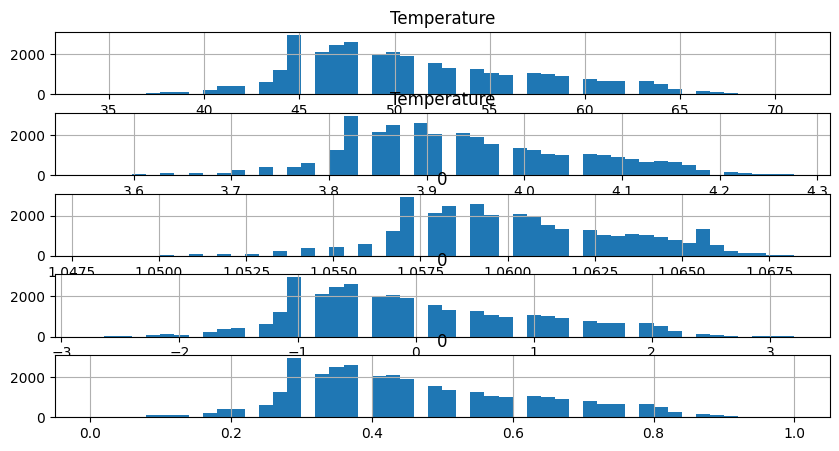

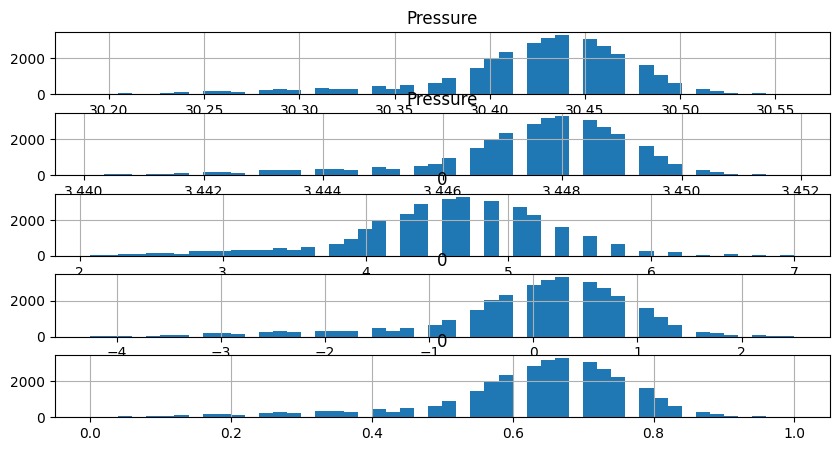

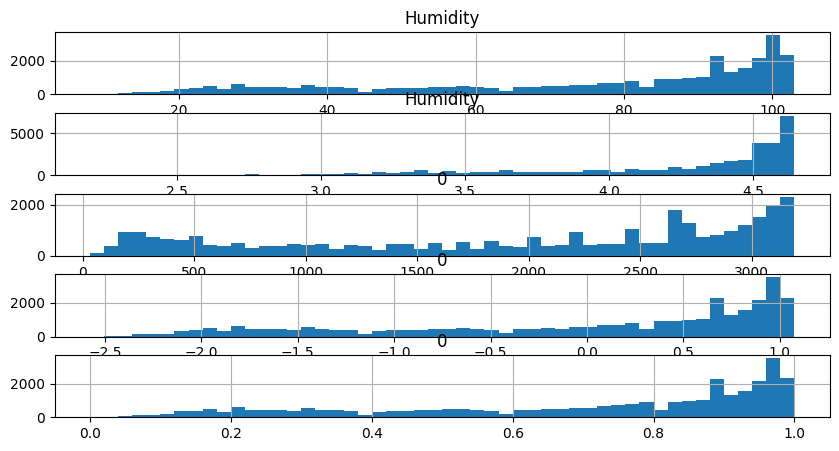

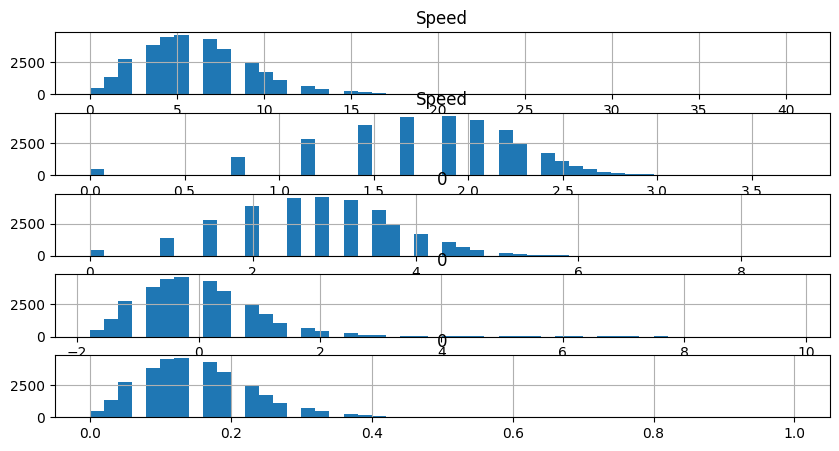

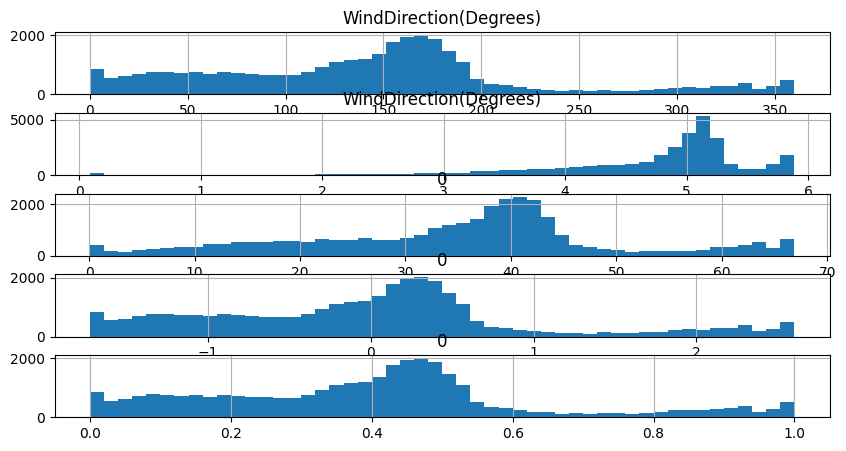

In [63]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

features_to_transform=['Temperature','Pressure','Humidity','Speed','WindDirection(Degrees)']
for  i in features_to_transform:
    fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(10,5))
    
    pd.DataFrame(x_train[i]).hist(ax=ax1,bins=50)
    pd.DataFrame((x_train[i]+1).transform(np.log)).hist(ax=ax2,bins=50)
    pd.DataFrame(stats.boxcox(x_train[i]+1)[0]).hist(ax=ax3,bins=50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(x_train[i]).reshape(-1,1))).hist(ax=ax4,bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(x_train[i]).reshape(-1,1))).hist(ax=ax5,bins=50)

In [65]:
transform={'Temperature':(x_train['Temperature']+1).transform(np.log),
          'Pressure':stats.boxcox(x_train[i]+1)[0],
          'Humidity':stats.boxcox(x_train[i]+1)[0],
          'Speed':(x_train[i]+1).transform(np.log),
          'WindDirection(Degrees)':MinMaxScaler().fit_transform(np.array(x_train[i]).reshape(-1,1)),}

In [66]:
for i in transform:
    x_train[i]=transform[i]

In [67]:
x_train.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Date,Month,Hour,Minute,Second,RiseMinute,RiseHour,SetMinute,SetHour
0,3.89182,41.956027,41.956027,0.492692,5.183972,29,9,23,55,26,13,6,13,18
1,3.89182,41.860372,41.860372,0.490996,5.180547,29,9,23,50,23,13,6,13,18
2,3.89182,38.977561,38.977561,0.440894,5.073610,29,9,23,45,26,13,6,13,18
3,3.89182,35.461622,35.461622,0.382426,4.932385,29,9,23,40,21,13,6,13,18
4,3.89182,29.577792,29.577792,0.291391,4.662967,29,9,23,35,24,13,6,13,18


In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.2,random_state=1)

In [69]:
xtrain.shape

(26148, 14)

In [70]:
xtest.shape

(6538, 14)

In [72]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# XGBOOST ALGO

In [73]:
from xgboost import XGBRegressor

params={
    'learning_rate':0.1,
    'max_depth':8
}

model=XGBRegressor(**params)

In [74]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
y_pred=model.predict(xtest)

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
r2score=r2_score(ytest,y_pred)
print(rmse)
print(r2score)


82.85069532574151
0.9295316821644116


# Using Multilayer perceptron for prediction

In [82]:
model=None
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=14))
model.add(Dropout(0.33))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1,activation='relu'))


model.compile(metrics='mse',loss='mae',optimizer=Adam(learning_rate=0.001))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1920      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [83]:
history=model.fit(xtrain,ytrain,validation_split=0.1,epochs=50,batch_size=32)

Epoch 1/50
736/736 [==============================] - 3s 2ms/step - loss: 121.5296 - mse: 54564.7188 - val_loss: 79.5040 - val_mse: 23312.2188
Epoch 2/50
736/736 [==============================] - 2s 3ms/step - loss: 85.8092 - mse: 27367.6562 - val_loss: 70.8055 - val_mse: 18988.3203
Epoch 3/50
736/736 [==============================] - 2s 2ms/step - loss: 81.9072 - mse: 25379.2070 - val_loss: 66.9304 - val_mse: 16715.2266
Epoch 4/50
736/736 [==============================] - 2s 2ms/step - loss: 79.4436 - mse: 23548.8184 - val_loss: 64.5559 - val_mse: 15708.9678
Epoch 5/50
736/736 [==============================] - 2s 2ms/step - loss: 77.8309 - mse: 23052.7871 - val_loss: 63.5629 - val_mse: 15308.0186
Epoch 6/50
736/736 [==============================] - 2s 2ms/step - loss: 75.9326 - mse: 22024.6309 - val_loss: 63.1412 - val_mse: 15192.0225
Epoch 7/50
736/736 [==============================] - 2s 2ms/step - loss: 75.2085 - mse: 21704.6465 - val_loss: 61.7132 - val_mse: 14643.7939
Epoch

In [84]:
ypred=model.predict(xtest)


205/205 [==============================] - 0s 1ms/step


In [85]:
ypred

array([[  1.2377495],
       [  1.2275268],
       [202.94106  ],
       ...,
       [  1.2289721],
       [  1.2377495],
       [  1.2243495]], dtype=float32)

In [91]:
mean_absolute_error(ytest,ypred)

49.17045069670305